In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import datetime 
from datetime import timedelta
import pytz
from pytz import timezone
from numpy import load
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import h5py
import pylab
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import librosa
import matplotlib.dates as md
import sys

In [36]:
sys.path.insert(1, '../modules')
import data
import display

In [40]:
df = pd.read_csv('../output/june_2019_df.csv')

In [41]:
df.head()

,Unnamed: 0,dBAS,assignment,median_dBAS
0,2019-06-01 00:00:42-04:00,63.53,2.0,67.140
1,2019-06-01 00:00:43-04:00,63.73,2.0,65.640
2,2019-06-01 00:00:44-04:00,64.94,2.0,65.555
3,2019-06-01 00:00:45-04:00,63.09,2.0,64.720
4,2019-06-01 00:00:46-04:00,61.66,2.0,64.595


In [42]:
df = df.set_index('Unnamed: 0')

In [51]:
del df.index.name

In [52]:
df.head()

,dBAS,assignment,median_dBAS
2019-06-01 00:00:42-04:00,63.53,2.0,67.140
2019-06-01 00:00:43-04:00,63.73,2.0,65.640
2019-06-01 00:00:44-04:00,64.94,2.0,65.555
2019-06-01 00:00:45-04:00,63.09,2.0,64.720
2019-06-01 00:00:46-04:00,61.66,2.0,64.595


# Example Plots

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme.

114     2019-06-03 14:01:54-04:00
270     2019-06-03 14:04:30-04:00
545     2019-06-03 14:09:05-04:00
594     2019-06-03 14:09:54-04:00
674     2019-06-03 14:11:14-04:00
713     2019-06-03 14:11:53-04:00
800     2019-06-03 14:13:20-04:00
1096    2019-06-03 14:18:16-04:00
1150    2019-06-03 14:19:10-04:00
1608    2019-06-03 14:26:48-04:00
1656    2019-06-03 14:27:36-04:00
1740    2019-06-03 14:29:00-04:00
1764    2019-06-03 14:29:24-04:00
1934    2019-06-03 14:32:14-04:00
1955    2019-06-03 14:32:35-04:00
2074    2019-06-03 14:34:34-04:00
2349    2019-06-03 14:39:09-04:00
2372    2019-06-03 14:39:32-04:00
2395    2019-06-03 14:39:55-04:00
2568    2019-06-03 14:42:48-04:00
2704    2019-06-03 14:45:04-04:00
2945    2019-06-03 14:49:05-04:00
3003    2019-06-03 14:50:03-04:00
3069    2019-06-03 14:51:09-04:00
3273    2019-06-03 14:54:33-04:00
3311    2019-06-03 14:55:11-04:00
3373    2019-06-03 14:56:13-04:00
3516    2019-06-03 14:58:36-04:00
Name: index, dtype: object
114     72.58
270    

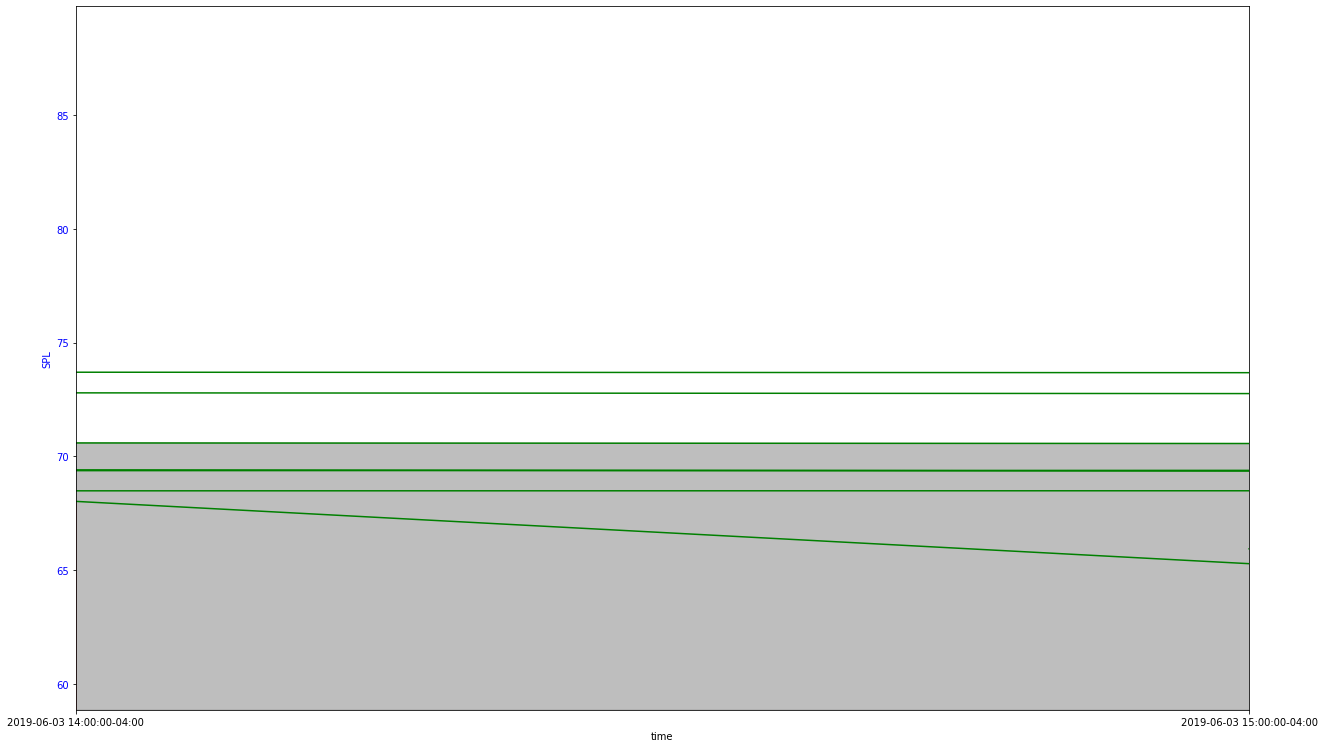

In [56]:
display.plot_truck_clusters_first(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            7, 11, 15, 'mean').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue.

In [ ]:
display.plot_truck_clusters_median(df['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue. There is only shading when the actual SPL is greater than the median SPL.

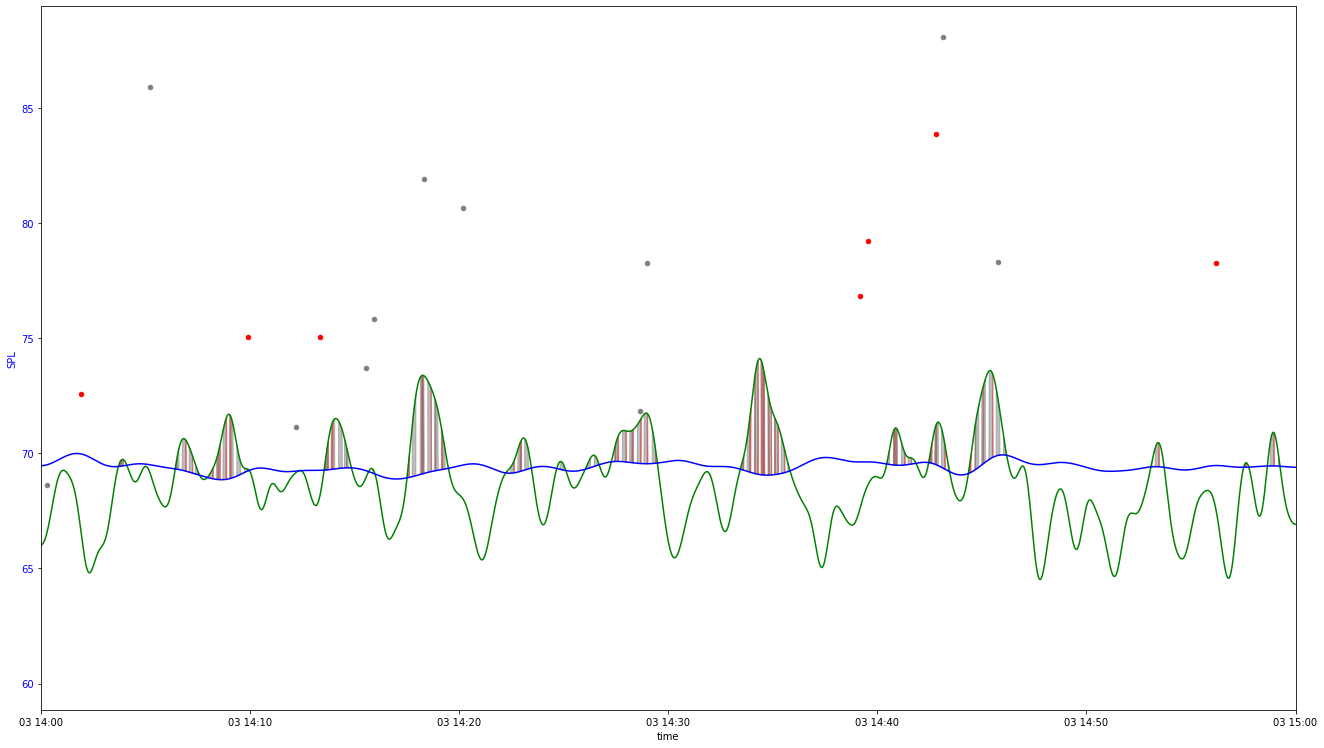

In [67]:
display.plot_truck_clusters_median_shading(all_joined_df_cut_median['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots SPL level in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme. The median SPL over the specificed time period is plotted in blue. There is only shading when the actual SPL is greater than the median SPL. This figure is tailored to present to an audience.

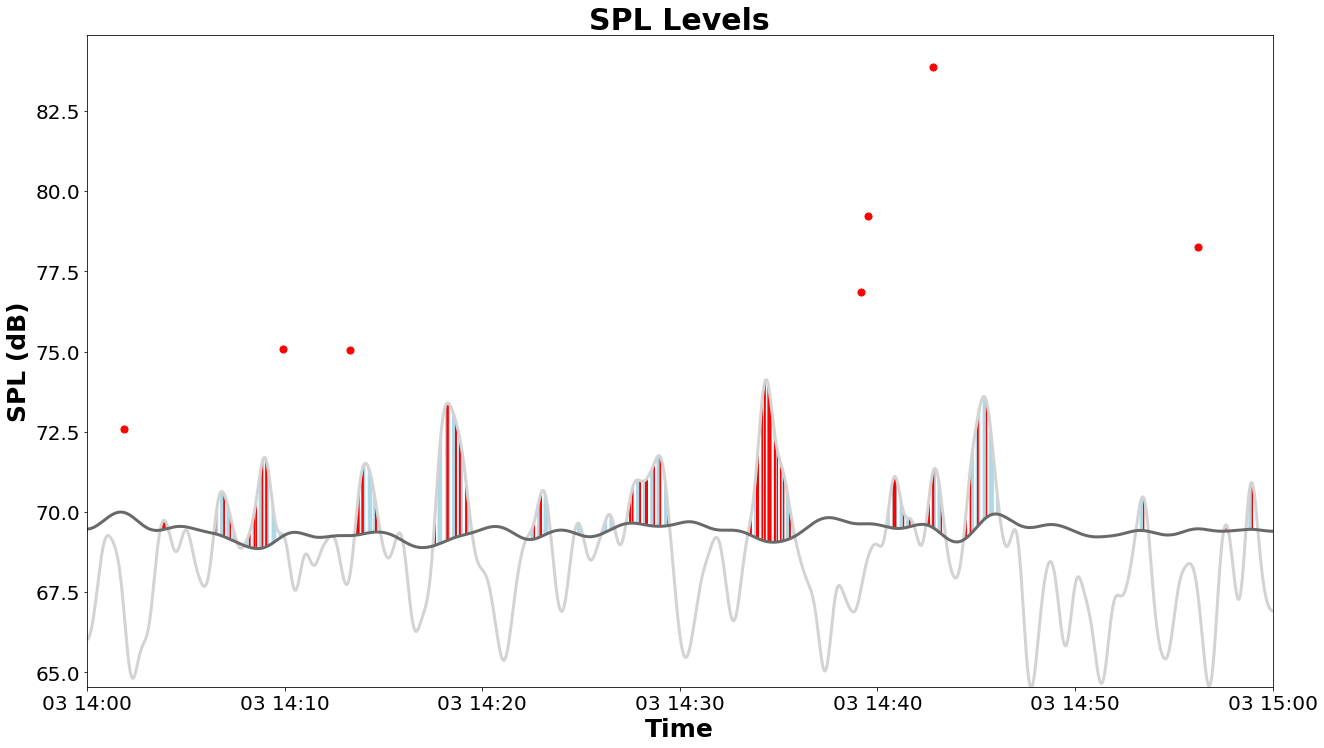

In [68]:
display.plot_truck_clusters_final(all_joined_df_cut_median['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots the SPL normalized to the median SPL (in other words, the difference between the actual SPL and the median SPL). The SPL level is in green, the shaded parts correspond to audio that is grouped into trucks (red) and non-trucks (gray). SPL peaks are plotted with dots in the same color scheme.

114    2019-06-03 14:01:54-04:00
594    2019-06-03 14:09:54-04:00
800    2019-06-03 14:13:20-04:00
2349   2019-06-03 14:39:09-04:00
2372   2019-06-03 14:39:32-04:00
2568   2019-06-03 14:42:48-04:00
3373   2019-06-03 14:56:13-04:00
Name: index, dtype: datetime64[ns, US/Eastern]
114     72.58
594     75.07
800     75.05
2349    76.86
2372    79.24
2568    83.87
3373    78.27
Name: dBAS, dtype: float64


/home/cusp/meh708/.conda/envs/redhook_analysis_storage/lib/python3.7/site-packages/pandas/core/common.py:232: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  result = np.asarray(values, dtype=dtype)


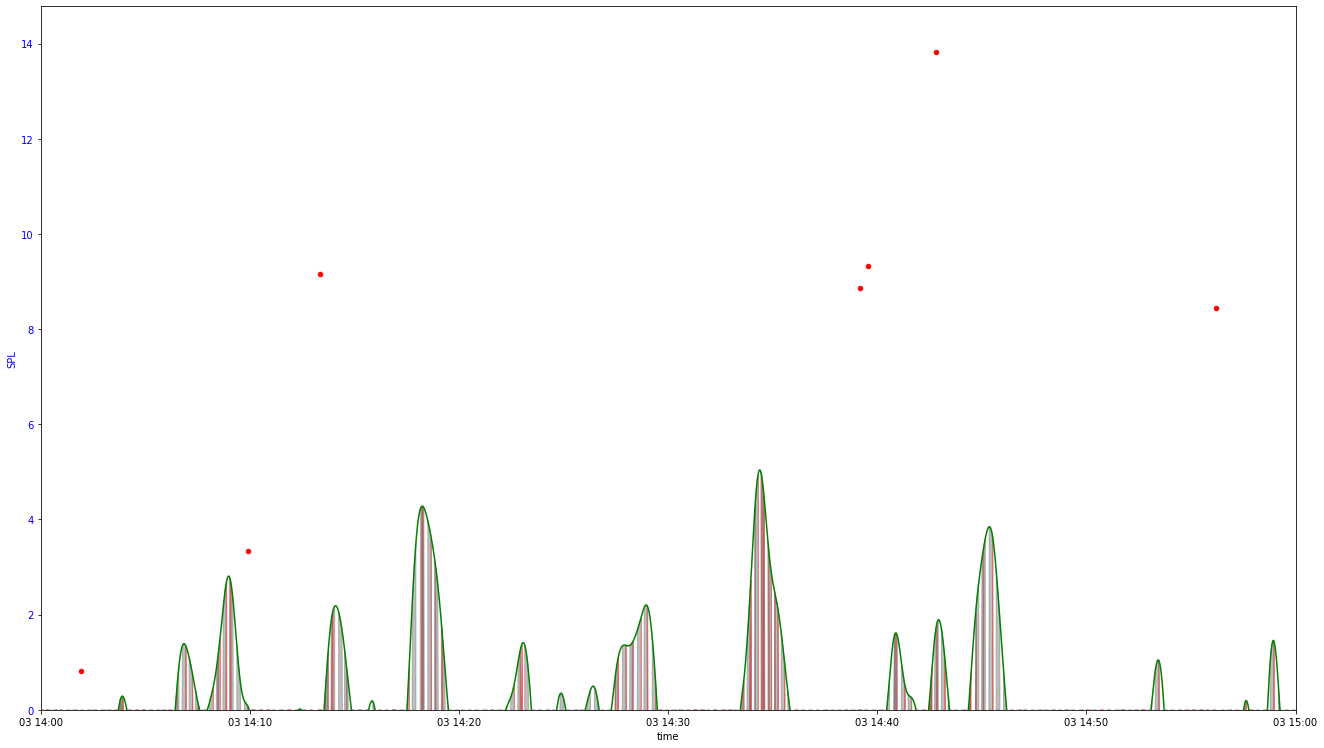

In [69]:
display.plot_truck_clusters_normalized(all_joined_df_cut_median['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()

Plots the SPL normalized to the median SPL (in other words, the difference between the actual SPL and the median SPL), but only when the sound at that second corresponds to a truck as determined by the clustering.

7


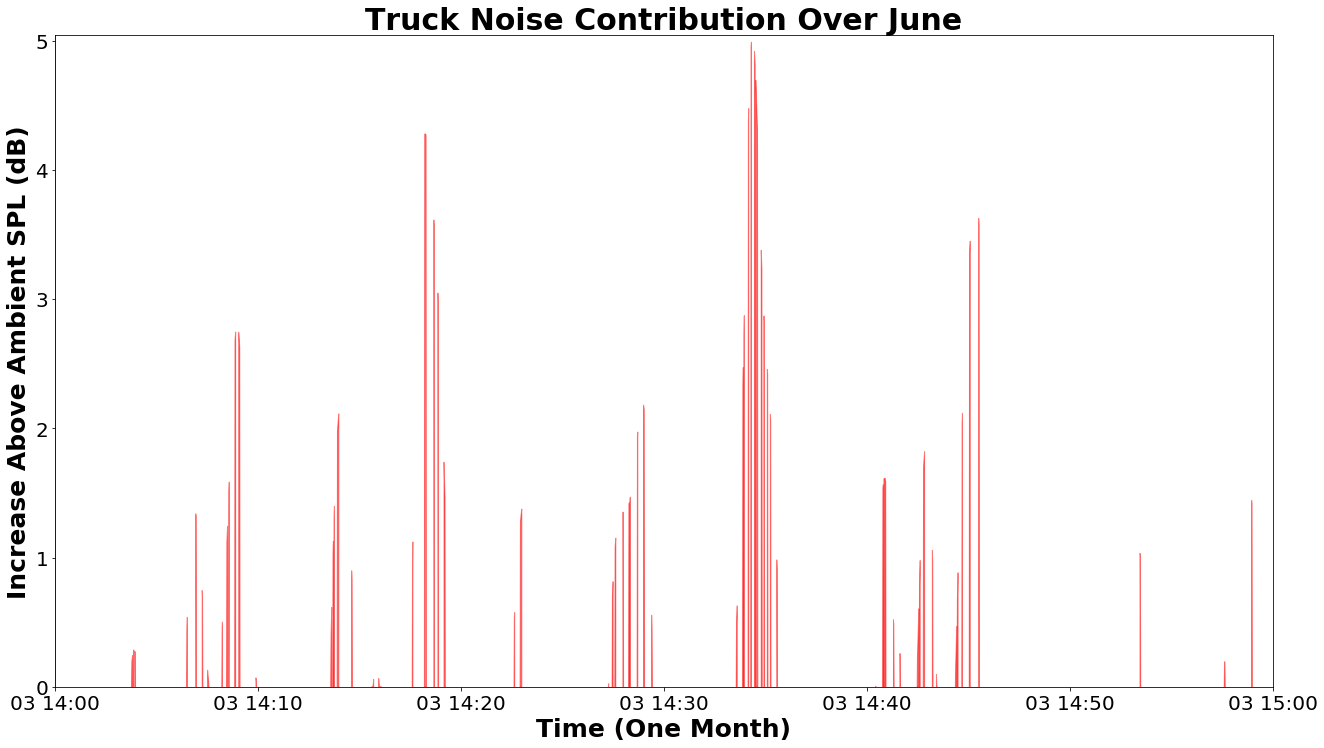

In [70]:
display.plot_truck_clusters_normalized_final(all_joined_df_cut_median['2019-06-03 14:00:00-04:00':'2019-06-03 15:00:00-04:00'], \
                            3, 20, 50, 1, 'gaussian').show()